**TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

**Overview:**
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).


In [10]:
import pandas as pd
import re
import string
df = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\blogs.csv')
print(df)

                                                   Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]


In [11]:
print(df.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [12]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [13]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

In [14]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


**Data Visualization**

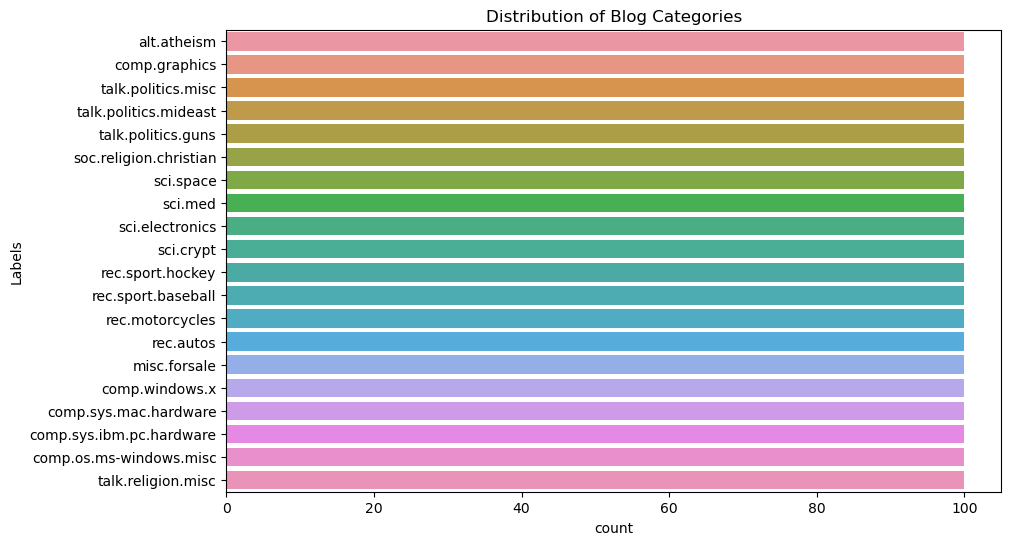

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title('Distribution of Blog Categories')
plt.show()

**Preprocessing Data**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}']", "", text)
    text = re.sub(r"\d+", "", text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This preprocessing step checks the text is clean, consistent, and ready for feature extraction improving the performance of ML model.
Imported necessary libraries like train_test_split from sklearn for splitting dataset TfidfVectorizer for converting text to numerical features and stopwords from nltk to remove common English stopwords.
The nltk library was downloaded to use its collection of stopwords for text cleaning.
The function clean_text() is defined to preprocess the blog text.
The text is first converted to lowercase to check uniformity.
Punctuation is removed using regular expression(re.sub()).
Any numerical digits are removed from the text.
Common words like 'the', 'and', 'is' etc are removed using stopwords from nltk as they do not add significant meaning to the text for classification purposes.

In [17]:
df['cleaned_text'] = df['Data'].apply(clean_text)
print(df['cleaned_text'].head())

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: cleaned_text, dtype: object


This will create a new column called 'cleaned_text' in the DataFrame by applying the clean_text function to the 'Data' column.
The clean_text function preprocesses the blog text by converting all characters to lowercase and removing any punctuation. This helps standardize the text data for further analysis checking that variations in case and punctuation do not affect the model's performance.
Each blog post's content is cleaned and stored in the 'cleaned_text' column ready for tokenization and feature extraction.

**Feature Extraction**

In [18]:
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In this, The TfidVectorizer is used to convert the cleaned text data into numerical features for the model. The max_features=5000 parameter limits the vectorizer to using the 5,000 most important words the blog posts which helps reduce the dimensionality of the data. The fit_transform() function applies this transformation to the cleaned text column converting it into a numerical matrix which is then stored in X. 
The toarray() method used to convert the spare matrix into a dense array format. The labels from the Labels column are stored in y to be used as the target variable for classification.

**Naive Bayes Model**

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1= f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1_Score: {f1}")


Accuracy: 0.8425
Precision: 0.8491171296453804
Recall: 0.8425
F1_Score: 0.8355146104552585


I have used the MultinominalNB model from sklearn,naive_bayes library to train a Naive Bayes classifier. The training dataset is split into 80% training data and 20% testing data using the train train_test_split function checking that the model was trained on a substantial portion of the data and evaluated on unseen data for better generalization.
The model was evaluated on the test set using various performance metrics including accuracy, precision, recall, and F1-score.
The output provided the accuracy, precision, recall, and F1 score for the classification task. These metrics help evaluate how well the model categorizes the blog posts into their respective categories.
Based on these scores I can determine the model's effectiveness and decide if further tuning or improvements are needed such as adjusting hyperparameters or using more advanced text processing techniques.

**Sentiment Analysis**

In [20]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity==0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)
print(df.groupby(['Labels', 'Sentiment']).size().unstack())

Sentiment                 Neutral  positive
Labels                                     
alt.atheism                    23        77
comp.graphics                  24        76
comp.os.ms-windows.misc        22        78
comp.sys.ibm.pc.hardware       20        80
comp.sys.mac.hardware          24        76
comp.windows.x                 27        73
misc.forsale                   16        84
rec.autos                      17        83
rec.motorcycles                26        74
rec.sport.baseball             29        71
rec.sport.hockey               34        66
sci.crypt                      19        81
sci.electronics                19        81
sci.med                        29        71
sci.space                      27        73
soc.religion.christian         13        87
talk.politics.guns             30        70
talk.politics.mideast          22        78
talk.politics.misc             22        78
talk.religion.misc             14        86


The get_sentiment function uses the TextBlob library to perform sentiment analysis, on the blog post texts. The function assigns a sentiment label based on the polarity score of the text like Positive, Negative, and Neutral.
Positive: If the polarity score is 0 which typically indicates generally positive sentiment.
Negative: If the polarity score is 0 which indicates a neutral or ambiguous sentiment
Neutral: If the polarity score is less than 0 indicating a generally negative sentiment.
The get_sentiment function is applied to each blog post in the Data column of the DataFrame. This creates a new column called Sentiment which contains the sentiment label for each blog post based on the analysis.
The distribution of sentiments across different categories is displayed. This code groups the DataFrame by the Labels and Sentiment counts the number of blog posts in each sentiment category for each blog category and, rearranges the data into a table format for easier interpretation. This helps in understanding,  how sentiment varies across different blog categories.

**Evaluation**

Evaluating Naive Bayes Classifier
Classification Report: 
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.81      0.84      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                

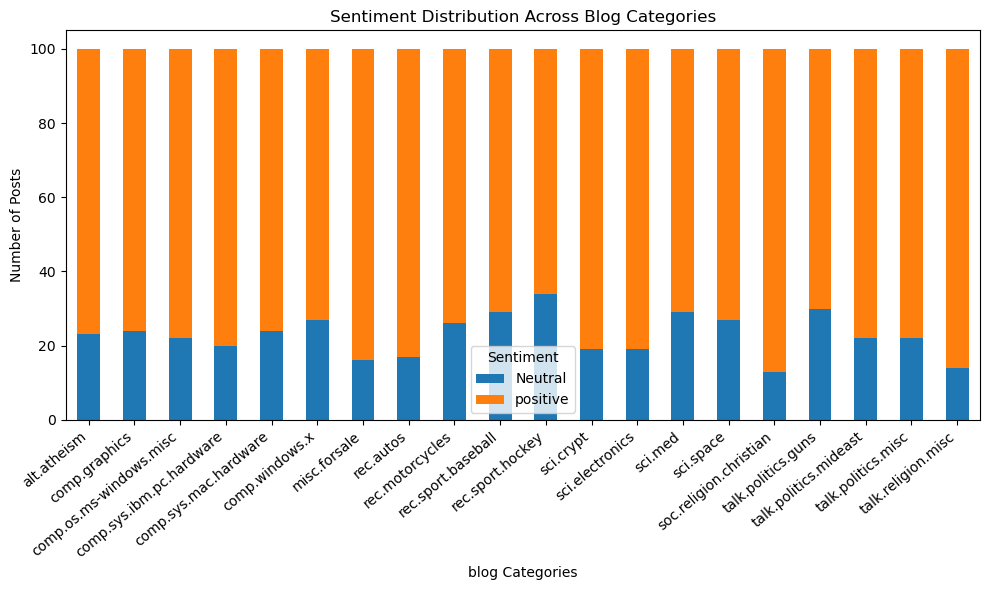

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print("Evaluating Naive Bayes Classifier")
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


print("Analyzing Sentiment Distribution")
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print("Sentiment Distribution Across Categories: \n", sentiment_distribution)

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('blog Categories')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

The classification report provides a detailed summary of the performance of the Naive Bayes classification on the test data. It includes metrics such, as precision, recall, and F1-Score for each category.
Precision measures how many of the predicted categories are correct, recall indicates how many of the actual categories were correctly identified and F1-Score provides a balance between precision and recall.
The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each category. It helps in understanding which categories are frequently misclassified.
The sentiment distribution analysis shows how different sentiments are distributed across the various blog categories.
By grouping the data by blog categories and sentiment I can visualize how sentiments vary across categories.
A stacked bar chart is used, to visualize the sentiment distribution across blog categories. Each bar represents a blog category and the segments within the bar indicate the proportion of positive, negative, and neutral sentiments.
This visualization helps in understanding, the general sentiment trends within each category and can reveal if certain categories tend to have more positive or negative sentiments.

Performance Metrics Analysis:
Accuracy: It means it measures the overall correctness of the classifier by calculating the ratio of correctly predicted instances to the total number of instances.
A high accuracy indicates that the model is performing well overall.
Precision: It is the ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances are positive.
High precision means that when the model predicts a category it is mostly correct. If precision is low for certain categories it says that the model is making a lot of false positives for those categories.
Recall: It is the ratio of correctly predicted positive observations to all the observations in the actual class. If recall is low for some categories it means the model is missing many of the actual instances of that category.
F1-Score: The F1-Score is the harmonic mean of precision and recall providing a balance between the two metrics.
A high F1-Score indicates a good balance between precision and recall. If it is low it suggests that the model is struggling to balance precision and recall.

Challenges:
Noisy data or inadequate preprocessing can affect model performance.
so, I have done data cleaning and preprocessing. Experiment with different preprocessing techniques to find the best approach for data.
The choice of features and method of feature extraction can influence model performance.
So, I have experimented with different feature extraction methods and parameters. Analyze which features contribute most to classification.

Overfitting occurs when the model performs well on training data but poorly on test data. Underfitting occurs when the model is too simplistic to capture the underlying patterns.
I have used techniques like cross-validation to check the model generalizes well. Adjust model parameters and complexity as needed.


**Random Forest**

In [22]:
import pandas as pd

y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print(y_train_series.value_counts())
print(y_test_series.value_counts())

rec.sport.hockey            85
sci.electronics             84
rec.motorcycles             84
sci.med                     83
rec.sport.baseball          82
talk.politics.misc          82
comp.graphics               82
alt.atheism                 82
rec.autos                   82
misc.forsale                82
sci.crypt                   81
talk.politics.mideast       80
sci.space                   79
comp.sys.mac.hardware       79
comp.os.ms-windows.misc     78
soc.religion.christian      77
talk.religion.misc          76
comp.windows.x              75
comp.sys.ibm.pc.hardware    75
talk.politics.guns          72
Name: Labels, dtype: int64
talk.politics.guns          28
comp.windows.x              25
comp.sys.ibm.pc.hardware    25
talk.religion.misc          24
soc.religion.christian      23
comp.os.ms-windows.misc     22
sci.space                   21
comp.sys.mac.hardware       21
talk.politics.mideast       20
sci.crypt                   19
misc.forsale                18
talk.politic

In this, I've converted y_train and y_test arrays into pandas series. Using the value_counts()function, I obtained the distribution of the target labels in both training datasets. This helps me to check if the dataset is imbalanced, meaning if one has significantly more samples than the other. The results provide insight into the proportion of each class in both the training and testing sets which can affect the model's performance

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(type(y_train), type(y_test))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


Here the TfidfVectorizer was used to transform the cleaned_text column into a numerical representation converting the text data into a matrix of TF-IDF features.
The labels were extracted from the Labels column of the dataset.
The dataset was then split into training and testing sets using train_test_split, with 80% of the data used for training and 20% for testing. A random state of 42 was used to check whether the results were reproducible. The types of training and testing label sets were confirmed to be Pandas Series.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")


Random Forest Accuracy: 0.9425
Random Forest Precision: 0.942988354037267
Random Forest Recall: 0.9425
Random Forest F1 Score: 0.941610031709028


I have trained a Random Forest Classifier with 100 trees and a balanced class weight to handle class imbalances. The model was trained on the training data and predictions were made on the test data(X_test)
To evaluate the model's performance I have calculated 4 key matric
Accuracy, Precision, Recall, F1 Score
The evaluation showed that the random Forest model achieved the best results

**Sentiment Analysis**

                        Actual                 Predicted
1860        talk.politics.misc        talk.politics.misc
353   comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware
1333                   sci.med                   sci.med
905         rec.sport.baseball        rec.sport.baseball
1289           sci.electronics           sci.electronics


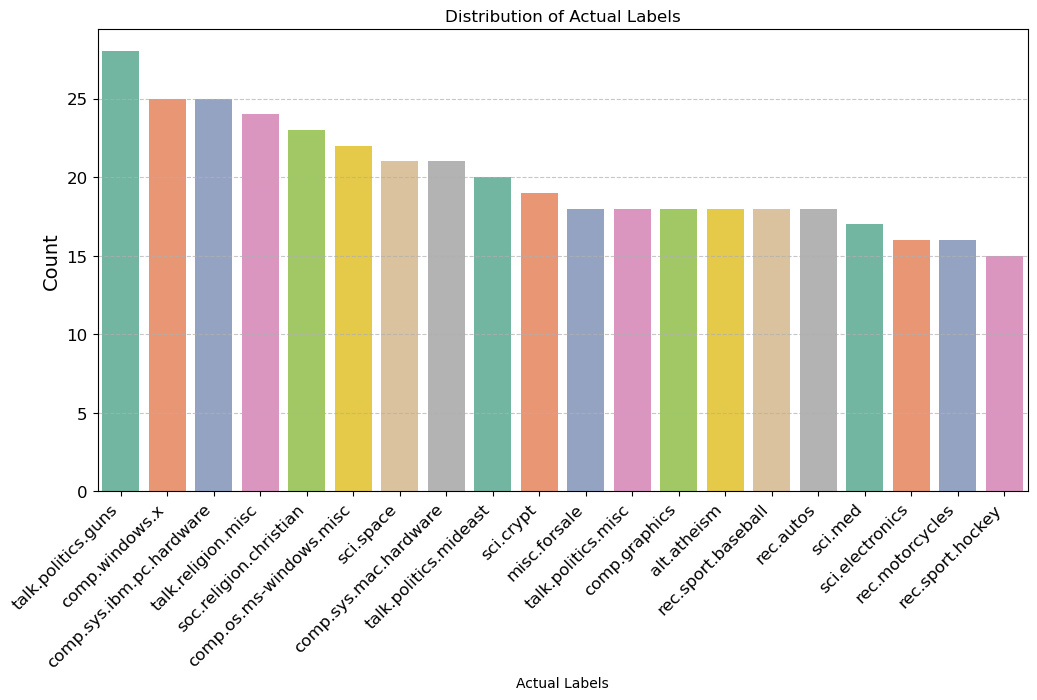

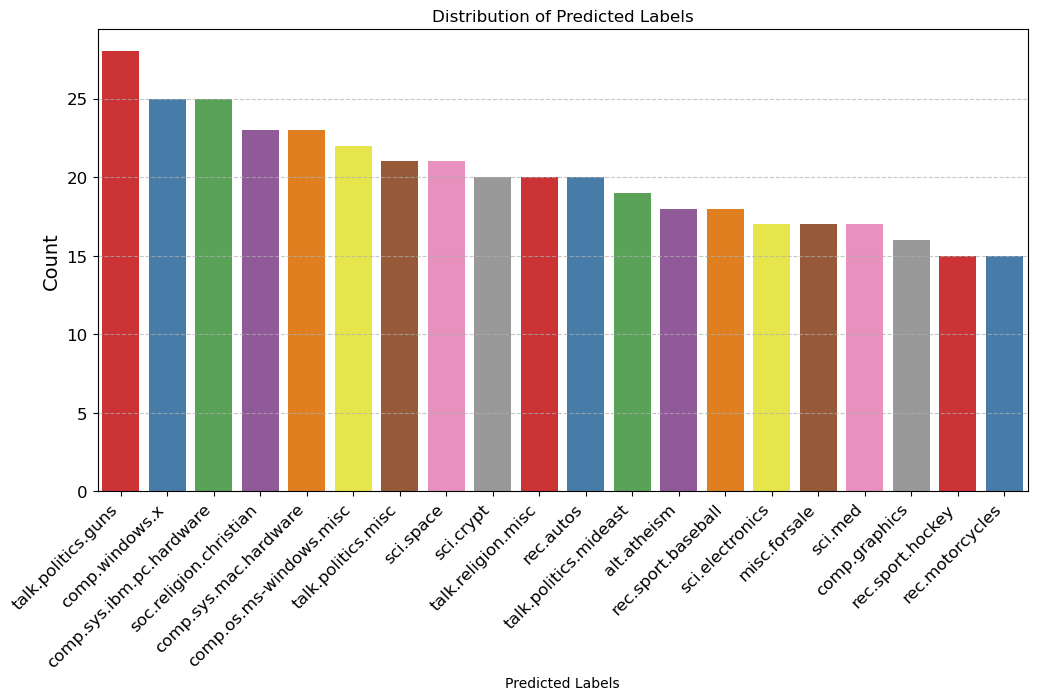

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
results_df.rename(columns={'actual': 'Actual', 'Predicted': 'Predicted'}, inplace=True)
print(results_df.head()) 

plt.figure(figsize=(12, 6))
sns.countplot(x='Actual', data=results_df, palette='Set2', order=results_df['Actual'].value_counts().index)
plt.title('Distribution of Actual Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='Predicted', data=results_df, palette='Set1', order=results_df['Predicted'].value_counts().index)
plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Labels')
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This creates two bar plots to visualize the distribution of the actual and predicted labels from the Random Forest model.
A new DataFrame results_df created contains the actual labels and the predicted labels
The first plot shows the distribution of the actual labels using a count plot displaying the frequency of each class
The second plot visualizes the distribution of the predicted labels in a similar manner comparing the counts for each class
Both polts use customized color palettes(Set1, Set2) gridlines for clarity and rotated x-axis labels for better readability.
The visualizations help in analyzing  how  well the predicted labels align with the actual labels and whether any class imbalance is present in the data


**Evaluation**

Random Forest Accuracy: 0.9425
Random Forest Precision: 0.942988354037267
Random Forest Recall: 0.9425
Random Forest F1 Score: 0.941610031709028

Classification Report: 

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.83      0.83        18
           comp.graphics       1.00      0.89      0.94        18
 comp.os.ms-windows.misc       1.00      1.00      1.00        22
comp.sys.ibm.pc.hardware       1.00      1.00      1.00        25
   comp.sys.mac.hardware       0.91      1.00      0.95        21
          comp.windows.x       1.00      1.00      1.00        25
            misc.forsale       0.88      0.83      0.86        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       1.00      1.00      1.00        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       0.95 

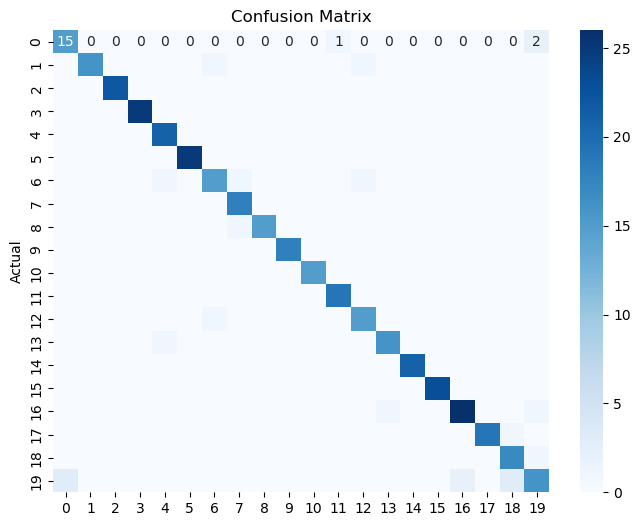

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1 Score: {f1}")

print("\nClassification Report: \n")
print(classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.show()


**Accuracy**: The accuracy score represents the proportion of correctly predicted instances out of the total number of instances. The Random Forest model achieved an accuracy, indicating that it correctly classified about 0.942% of the test data.
**Precision**: The weighted precision score reflects how many predicted positive labels were correct. A higher precision means fewer false positives. In this case, the Random Forest model has a reasonable precision implying that it makes accurate positive predictions.
**Recall**: The weighted recall score indicates the proportion of actual positive labels that were correctly identified by the model. A higher recall means fewer false negatives suggesting the model is good at detecting the actual positives.
**F1_Score**:The F1 Score combines both precision and recall into a single metric. It balances the trade-off between precision and recall showing that the model maintains a good balance between identifying true positives and avoiding false positives

**Classification Report**:The classification report provides a detailed performance breakdown for each class. The precision, recall, and F1 scores for each class can help us understand which classes are more accurately predicted by the Random Forest model. 

**Confusion Matrix**: The confusion matrix visually shows the model's performance by displaying the true positive, true negative, false positive, and false negative predictions. The majority of the predictions are along the diagonal which means is correctly predicting those labels. The heatmap makes it easy to see where the model is misclassifying as the off-diagonal elements represent errors.

**ROC Curve and AUC Score**

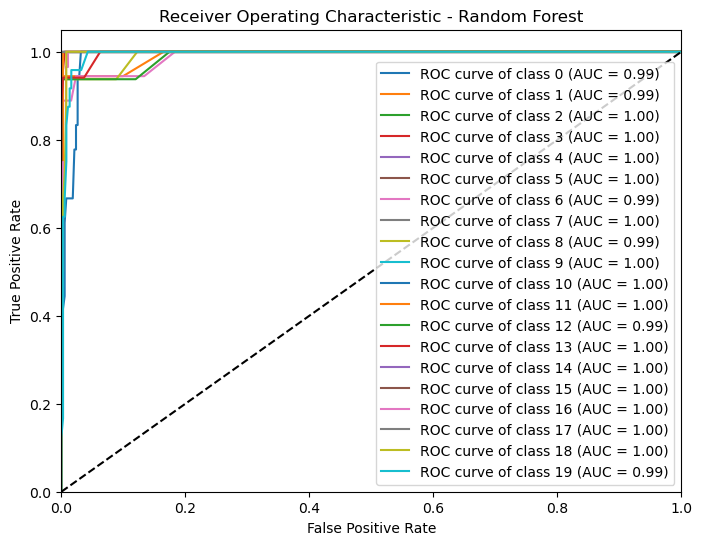

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_test_bin = label_binarize(y_test, classes=rf_model.classes_)
y_pred_rf_prob = rf_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(rf_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_rf_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(len(rf_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


In this, I used the ROC-AUC method to evaluate the performance of the Random Forest model
The label_binarize function was used to convert the target labels into binary form to handle multi-class classification.
For each class, the false positive rate and true positive rate were calculated using the roc_curve function.

The AUC for each class was computed using the AUC function which provides a single value representing the model's performance for that class.

A ROC curve was plotted for each class where the closer the curve is to the top-left corner the better the model is at distinguishing between classes.

The dashed diagonal line represents the performance of a random classifier where AUC=0.5 serving as a reference for comparison.

The plot visually shows how well the Random Forest model performs for each class and the AUC score provides a numerical summary of this performance.
